# Fitting a Linear Model to the Step Response of a Gravity Drained Tank

by Jeffrey Kantor  (jeff at nd.edu). The latest version of this notebook is available at [https://github.com/jckantor/CBE30338](https://github.com/jckantor/CBE30338). 

### Summary

In the example we show how to fit the step response of a nonlinear system, a gravity drained tank, to a first order linear system.

## Mass Balance for Tank with Constant Cross-Sectional Area

For a tank with constant cross-sectional area, such as a cylindrical or rectangular tank, the liquid height is described by a differential equation

$$A\frac{dh}{dt} = q_{in}(t) - q_{out}(t)$$

where $q_{out}$ is a function of liquid height. Torricelli's law tells the outlet flow from the tank is proportional to square root of the liquid height

$$ q_{out}(h) = C_v\sqrt{h} $$

Dividing by area we obtain a nonlinear ordinary differential equation 

$$ \frac{dh}{dt} = - \frac{C_V}{A}\sqrt{h} + \frac{1}{A}q_{in}(t) $$

in our standard form where the LHS derivative appears with a constant coefficient of 1.

## Nonlinear Step Response

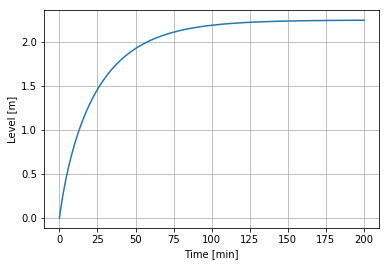

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

Cv  = 0.1     # Outlet valve constant [cubic meters/min/meter^1/2]
A   = 1.0     # Tank area [meter^2]

# inlet flow rate in cubic meters/min
def qin(t):
    return 0.15

def deriv(h,t):
    return qin(t)/A - Cv*np.sqrt(h)/A

IC = [0.0]
t = np.linspace(0,200,101)
h = odeint(deriv,IC,t)

plt.plot(t,h)

plt.xlabel('Time [min]')
plt.ylabel('Level [m]')
plt.grid();

## Linear Approximation of the Step Response

The step response of the gravity drained to a change in flowrate looks similar to the step response of a firat order linear system. Let's try a linear approximation

$$\tau\frac{dx}{dt} + x = Ku$$

which has a step response solution that can be written

$$x(t) = x_{ss} + (x_0 - x_{ss})\exp(-t/\tau)$$

where $x_{ss} = Ku_{ss}$. There are two parameters, $K$ and $\tau$, which we need to estimate in order to fit the linear approximation to the nonlinear simulation results computed above.

### Fit for $K$

The steady state gain $K$ of the linear system is given by

$$ K = \frac{x_{ss} - x(0)}{u_{ss} - u_0}$$

where $u_0$ is the initial input, $u_{ss}$ is the steady-state input, and $x_0$ and $x_{ss}$ are corresponding values of the state variable. In the case of liquid level, $h\sim x$ and $q_{in}\sim u$, therefore an estimate of $K$ is 

$$ K = \frac{h_{ss} - h_0}{q_{in,ss} - q_{in,0}}$$

In [2]:
q0,h0 = 0,0            # initial conditions
qss = qin(t[-1])       # final input
hss = h[-1]            # python way to get the last element in a list

K = (hss-h0)/(qss-q0)  # step change in output divided by step change in input
print('Steady-State Gain is approximately = ', K)

Steady-State Gain is approximately =  [ 14.98595148]


### Fit for $\tau$

From the formula for the solution of a first-order linear equation with constant input,

$$\frac{x_{ss} - x(t)}{x_{ss} - x_0} = \exp(-t/\tau) \qquad \implies \qquad \tau = \frac{-t}{\ln\frac{x_{ss} - x(t)}{x_{ss} - x_0}}$$

We pick one point representative of the transient portion of the nonlinear response. In this case the response at $t = 25$ minutes accounts for $\approx$60% of the ultimate response, so we choose point as a representative point.

In [3]:
k = sum(t<25)        # find index in t corresponding to 25 minutes
tk = t[k]
hk = h[k]

tau = -tk/np.log((hss-hk)/(hss-h0))
print('Estimated time constant is ', tau)

Estimated time constant is  [ 23.92271579]


### Comparing the linear approximation to the nonlinear simulation

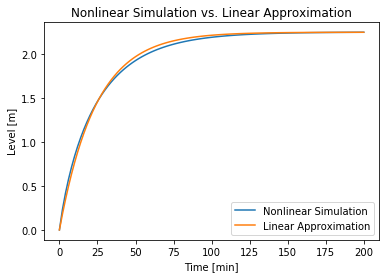

In [4]:
u0 = q0
uss = qss

xss = K*(uss - u0)
xpred = xss - xss*np.exp(-t/tau)

plt.plot(t,h)
plt.plot(t,xpred)
plt.legend(['Nonlinear Simulation','Linear Approximation'])
plt.xlabel('Time [min]')
plt.ylabel('Level [m]')
plt.title('Nonlinear Simulation vs. Linear Approximation');